## Logistic Regression Exercise

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

### --1)

In [37]:
iris_data = pd.read_csv('iris-data-clean.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [38]:
df = iris_data.replace(['Setosa','Virginica','Versicolor'],[0,1,2])
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X = df.iloc[:,0:4]
y = df['class']

print(X)
print(y)

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0                5.1             3.5              1.4             0.2
1                4.9             3.0              1.4             0.2
2                4.7             3.2              1.3             0.2
3                4.6             3.1              1.5             0.2
4                5.0             3.6              1.4             0.2
..               ...             ...              ...             ...
140              6.7             3.0              5.2             2.3
141              6.3             2.5              5.0             1.9
142              6.5             3.0              5.2             2.0
143              6.2             3.4              5.4             2.3
144              5.9             3.0              5.1             1.8

[145 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    1
143    1
144    1
Name: class, Length: 145, dtype: int6

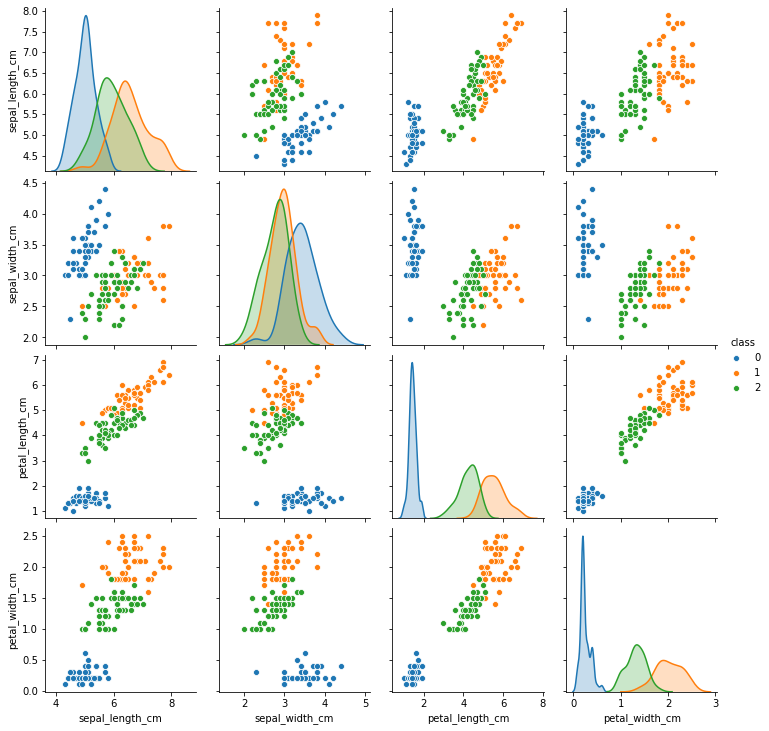

In [40]:
sb.pairplot (df, hue='class')  # Show different levels of a categorical variable by the color of plot elements
plt.show()

### --2)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 4)
(37, 4)
(108,)
(37,)


In [67]:
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42)
results = lr.fit(X_train,y_train)
print(results.intercept_)
print(results.coef_)

[  9.56863437 -12.53639591   2.96776155]
[[-0.43118482  0.85115264 -2.34301731 -1.01594584]
 [ 0.02336033 -0.4932486   2.59516697  1.77373322]
 [ 0.4078245  -0.35790404 -0.25214965 -0.75778739]]


In [68]:
y_pre=lr.predict(X_test)
print(y_pre)

[2 1 0 0 0 1 1 1 2 0 0 2 1 1 2 0 1 1 1 2 2 1 0 2 0 2 2 2 1 0 0 0 1 1 0 0 1]


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre,labels=[1,0]))

0.9459459459459459
[[13  0]
 [ 0 13]]


In [70]:
print(lr.predict([[4.9, 3.5, 1.6, 0.25]]))

[0]


### --3)

In [71]:
X2=df.iloc[:,0:2]
y2=df['class']
print(X2)
print(y2)

     sepal_length_cm  sepal_width_cm
0                5.1             3.5
1                4.9             3.0
2                4.7             3.2
3                4.6             3.1
4                5.0             3.6
..               ...             ...
140              6.7             3.0
141              6.3             2.5
142              6.5             3.0
143              6.2             3.4
144              5.9             3.0

[145 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    1
143    1
144    1
Name: class, Length: 145, dtype: int64


In [80]:
df_zero = df.loc[df['class'] == 0]
df_one = df.loc[df['class'] == 1]
df_two = df.loc[df['class'] == 2]
df_zero.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Text(0, 0.5, 'sepal_width_cm'), Text(0.5, 0, 'sepal_length_cm')]

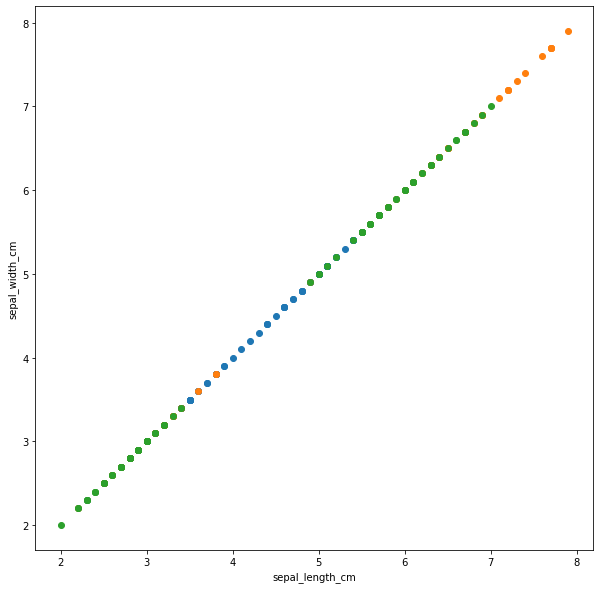

In [83]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(df_zero.iloc[:,0:2],df_zero.iloc[:,0:2])
ax.scatter(df_one.iloc[:,0:2],df_one.iloc[:,0:2])
ax.scatter(df_two.iloc[:,0:2],df_two.iloc[:,0:2])
ax.set(xlabel='sepal_length_cm',ylabel='sepal_width_cm')

In [72]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, random_state=42)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(108, 2)
(37, 2)
(108,)
(37,)


In [78]:
lr2=LogisticRegression()
outcome=lr2.fit(X2_train,y2_train)
print(outcome.intercept_)
print(outcome.coef_)

[  7.77095968 -10.38212658   2.6111669 ]
[[-2.51055599  1.98708156]
 [ 2.03380013 -0.4328184 ]
 [ 0.47675586 -1.55426316]]


In [65]:
y2_pre=lr2.predict(X2_test)
print(y2_pre)

[1 1 0 0 0 1 1 2 2 0 0 2 2 2 2 2 1 2 1 2 2 1 0 2 0 1 1 2 1 0 0 0 1 1 0 0 2]


In [66]:
print(accuracy_score(y2_test,y2_pre))
print(confusion_matrix(y2_test,y2_pre,labels=[1,0]))

0.7567567567567568
[[ 9  0]
 [ 0 12]]
